In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("Covid Data.csv")
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [ ]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [ ]:
df["DATE_DIED"].value_counts()

,count
DATE_DIED,
9999-99-99,971633
06/07/2020,1000
07/07/2020,996
13/07/2020,990
16/06/2020,979
...,...
24/11/2020,1
17/12/2020,1
08/12/2020,1


In [ ]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


#Data Preprocessing

In [ ]:
#Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


**1 means yes and 0 means no and values as 97, 98 and 99 are missing data**

In [ ]:
df.loc[df['SEX'] == 2, 'PREGNANT'] = 2

updated_rows = df[df['SEX'] == 2]
print("Updated rows where SEX is 2:\n", updated_rows)

unique_sex_values = df['PREGNANT'].unique()
print("Unique values in the SEX column:", unique_sex_values)

Updated rows where SEX is 2:
          USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
1            2             1    2             1  03/06/2020       97   
2            2             1    2             2  09/06/2020        1   
4            2             1    2             1  21/06/2020       97   
11           2             1    2             2  9999-99-99        2   
12           2             1    2             2  9999-99-99        2   
...        ...           ...  ...           ...         ...      ...   
1048570      2            13    2             1  9999-99-99       97   
1048571      1            13    2             2  9999-99-99        2   
1048572      2            13    2             1  9999-99-99       97   
1048573      2            13    2             1  9999-99-99       97   
1048574      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
1                1   72         2   

In [ ]:
df['INTUBED'].value_counts()

,count
INTUBED,
97,848544
2,159050
1,33656
99,7325


In [ ]:
df['PREGNANT'].value_counts()

,count
PREGNANT,
2,1036690
1,8131
98,3754


In [ ]:
df['CLASIFFICATION_FINAL'].value_counts()

,count
CLASIFFICATION_FINAL,
7,499250
3,381527
6,128133
5,26091
1,8601
4,3122
2,1851


In [ ]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [ ]:
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,2,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,2,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,2,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


# Ignoring rows with missing values

In [ ]:
cols = ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION',
        'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO']
for col in cols :
    df = df[(df[col] == 1)|(df[col] == 2)]

In [ ]:
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,2,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,2,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,2,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [ ]:
print('MALE',df.query('SEX==2')['PREGNANT'].value_counts(), sep='\n')
print('FEMALE',df.query('SEX==1')['PREGNANT'].value_counts(), sep='\n')

MALE
PREGNANT
2    511936
Name: count, dtype: int64
FEMALE
PREGNANT
2     502200
1       7841
98      3175
Name: count, dtype: int64


In [ ]:
df['PREGNANT'] = df['PREGNANT'].replace(97,2)
df['PREGNANT'] = df['PREGNANT'].replace(98,2)

In [ ]:
df['PREGNANT'].value_counts()

,count
PREGNANT,
2,1017311
1,7841


In [ ]:
df['DATE_DIED'] = [0 if row =='9999-99-99' else 1 for row in df['DATE_DIED']]

In [ ]:
df['DATE_DIED'].value_counts()

,count
DATE_DIED,
0,950438
1,74714


In [ ]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
DATE_DIED =>	 2
INTUBED =>	 4
PNEUMONIA =>	 2
AGE =>	 121
PREGNANT =>	 2
DIABETES =>	 2
COPD =>	 2
ASTHMA =>	 2
INMSUPR =>	 2
HIPERTENSION =>	 2
OTHER_DISEASE =>	 2
CARDIOVASCULAR =>	 2
OBESITY =>	 2
RENAL_CHRONIC =>	 2
TOBACCO =>	 2
CLASIFFICATION_FINAL =>	 7
ICU =>	 4


#Data analysis

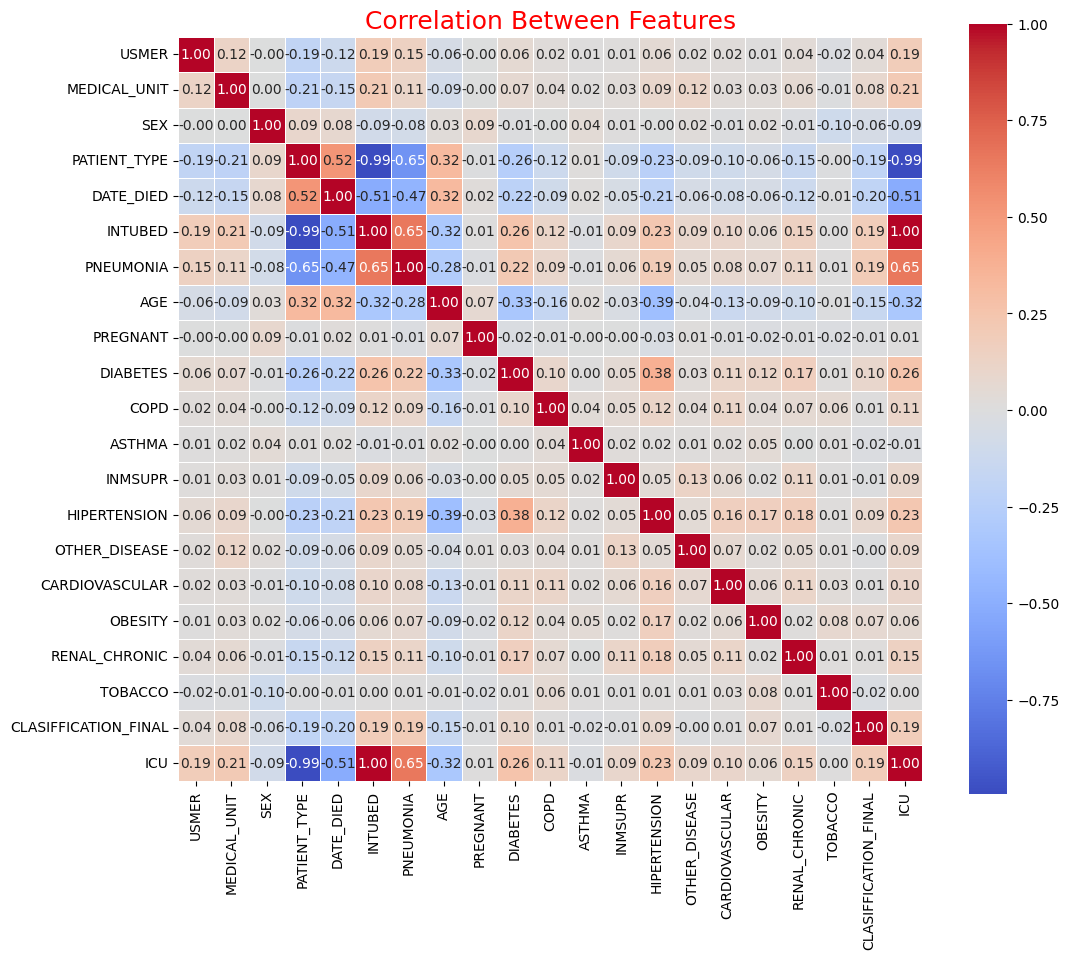

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Between Features', fontsize=18, color='red')
plt.show()

<Axes: title={'center': 'Age Distribution'}, xlabel='AGE', ylabel='Count'>

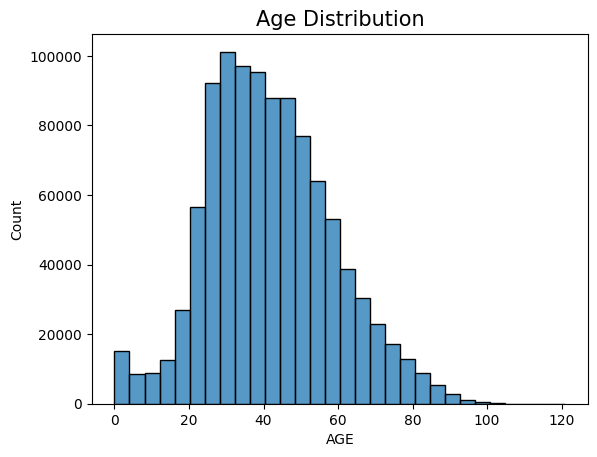

In [ ]:
plt.title('Age Distribution', fontsize=15)
sns.histplot(data=df, x=df['AGE'],bins=30)

<Axes: xlabel='DATE_DIED', ylabel='AGE'>

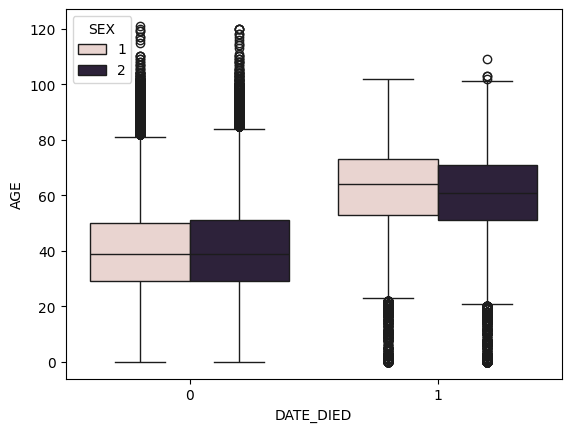

In [ ]:
sns.boxplot(x="DATE_DIED", y="AGE",hue="SEX",data=df)

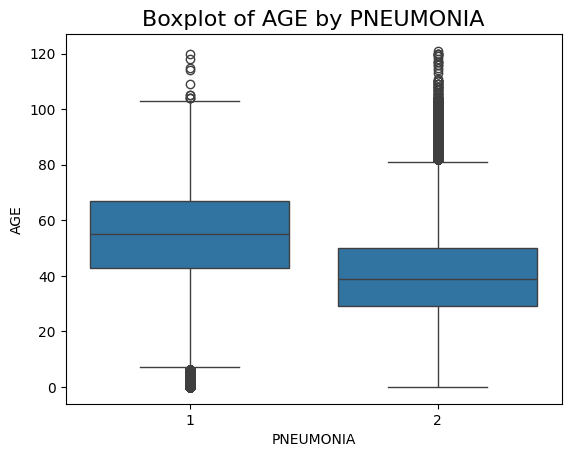

In [ ]:
sns.boxplot(x='PNEUMONIA', y='AGE', data=df)
plt.title('Boxplot of AGE by PNEUMONIA', fontsize=16)
plt.show()

In [ ]:
grouped_data = df.groupby(['DIABETES', 'HIPERTENSION'])['AGE'].mean()
print(grouped_data)

DIABETES  HIPERTENSION
1         1               60.410144
          2               53.035055
2         1               54.898110
          2               38.078753
Name: AGE, dtype: float64


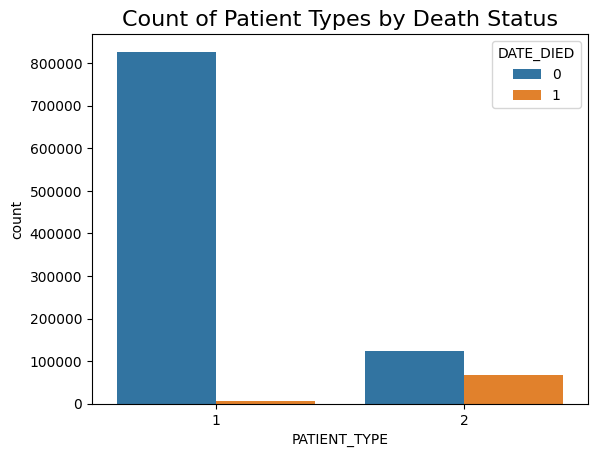

In [ ]:
sns.countplot(data=df, x='PATIENT_TYPE', hue='DATE_DIED')
plt.title('Count of Patient Types by Death Status', fontsize=16)
plt.show()

In [ ]:
correlation_with_death = df.corr()['DATE_DIED'].sort_values(ascending=False)
print(correlation_with_death)

DATE_DIED               1.000000
PATIENT_TYPE            0.520023
AGE                     0.322412
SEX                     0.080882
PREGNANT                0.020997
ASTHMA                  0.017221
TOBACCO                -0.005245
INMSUPR                -0.049308
OBESITY                -0.056427
OTHER_DISEASE          -0.057247
CARDIOVASCULAR         -0.076582
COPD                   -0.089846
USMER                  -0.118973
RENAL_CHRONIC          -0.119396
MEDICAL_UNIT           -0.154588
CLASIFFICATION_FINAL   -0.197313
HIPERTENSION           -0.205158
DIABETES               -0.217115
PNEUMONIA              -0.470800
ICU                    -0.511013
INTUBED                -0.512086
Name: DATE_DIED, dtype: float64


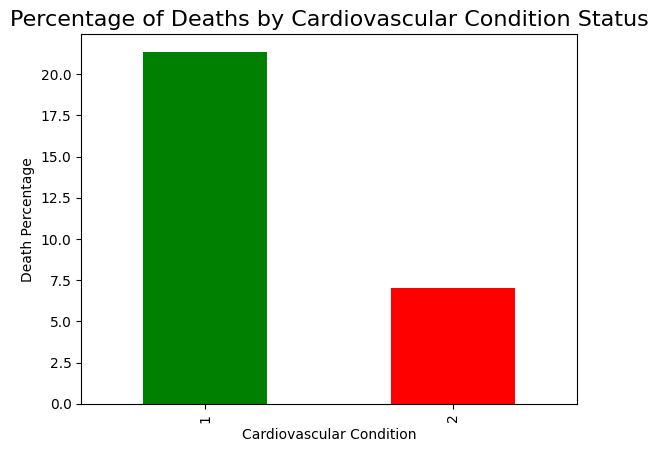

In [ ]:
cardio_death = df.groupby('CARDIOVASCULAR')['DATE_DIED'].mean() * 100
cardio_death.plot(kind='bar', color=['green', 'red'])
plt.title('Percentage of Deaths by Cardiovascular Condition Status', fontsize=16)
plt.xlabel('Cardiovascular Condition')
plt.ylabel('Death Percentage')
plt.show()

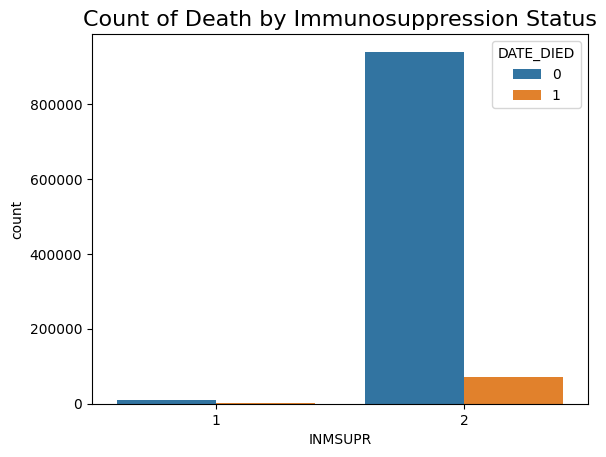

In [ ]:
sns.countplot(data=df, x='INMSUPR', hue='DATE_DIED')
plt.title('Count of Death by Immunosuppression Status', fontsize=16)
plt.show()

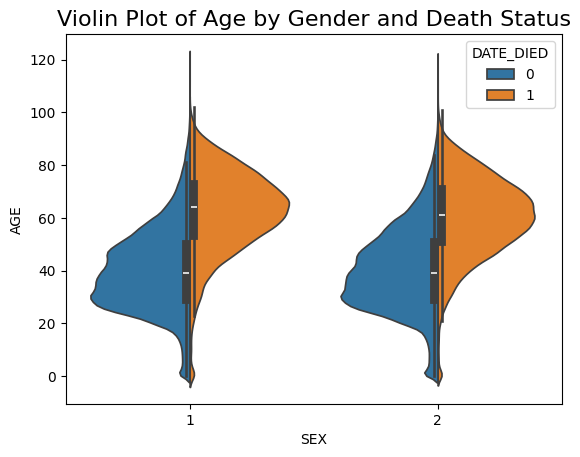

In [ ]:
sns.violinplot(x='SEX', y='AGE', hue='DATE_DIED', data=df, split=True)
plt.title('Violin Plot of Age by Gender and Death Status', fontsize=16)
plt.show()

#Feature Selection


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
# selected binary features to run chi-squared on
chi_cols = ['ICU','INTUBED','PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION',
        'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO','PREGNANT','SEX']
X_chi = df[chi_cols]
Y = df['DATE_DIED']


scores, pvalues = chi2(X_chi, Y)
Chi2_results  = pd.DataFrame({
    "Feature": chi_cols,
    "Chi2 Score": scores,
    "P-value": pvalues
}).sort_values(by="Chi2 Score", ascending=False)
pd.options.display.float_format = '{:20,.5f}'.format
print(Chi2_results)

           Feature           Chi2 Score              P-value
1          INTUBED      4,627,070.85773              0.00000
0              ICU      4,594,485.78266              0.00000
2        PNEUMONIA         14,152.51922              0.00000
7     HIPERTENSION          3,074.85165              0.00000
3         DIABETES          2,702.05303              0.00000
14             SEX          1,118.19892              0.00000
10         OBESITY            229.16314              0.00000
11   RENAL_CHRONIC            129.61823              0.00000
9   CARDIOVASCULAR             58.43290              0.00000
4             COPD             57.61382              0.00000
8    OTHER_DISEASE             43.86091              0.00000
6          INMSUPR             16.40822              0.00005
5           ASTHMA              4.45388              0.03482
13        PREGNANT              1.72176              0.18947
12         TOBACCO              1.08938              0.29661


In [ ]:


# Apply SelectKBest with ANOVA F-Test
X_continuous = pd.DataFrame(df['AGE'])
f_selector = SelectKBest(score_func=f_classif, k='all')  # Select all features initially
f_scores = f_selector.fit(X_continuous, Y)

# Display scores
anova_results = pd.DataFrame({
    "Feature": X_continuous.columns,
    "F Score": f_scores.scores_,
    "P-value": f_scores.pvalues_
}).sort_values(by="F Score", ascending=False)
print(anova_results)

  Feature              F Score              P-value
0     AGE        118,926.43035              0.00000


#Outlier Analysis

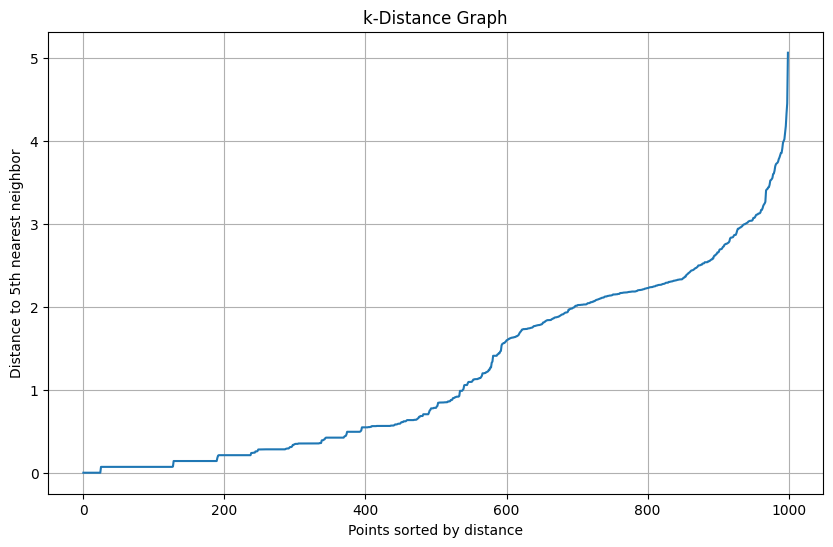

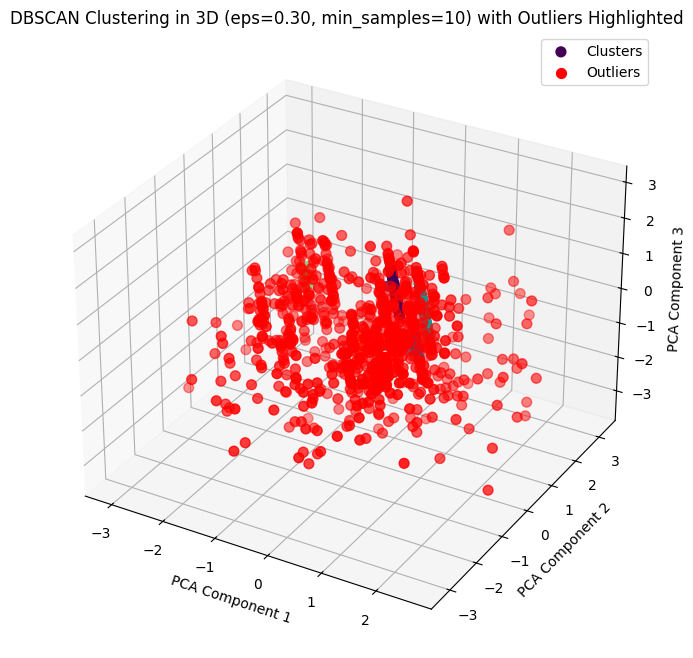

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer

data = df.copy()

# Step 1: Sampling a subset of data to reduce memory usage (e.g., 1000 rows)
sampled_data = data.sample(n=1000, random_state=42)  # Adjust the number of rows as needed

# Step 2: Select numeric columns only (DBSCAN works on numeric data)
numeric_data = sampled_data.select_dtypes(include=[np.number])

# Step 3: Handle missing values (Impute with the median to minimize memory usage)
imputer = SimpleImputer(strategy='median')
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

# Step 4: Reduce dimensionality early using PCA (reduce memory by working with fewer features)
# We will reduce the data to 10 principal components, which should capture most of the variance.
pca = PCA(n_components=10)
data_pca = pca.fit_transform(numeric_data_imputed)

# Step 5: Standardize the reduced data (important for DBSCAN)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)

# Step 6: Plot k-distance graph to visualize the optimal eps
# Compute k-nearest neighbors for all points
neighbors = NearestNeighbors(n_neighbors=5)  # 5 nearest neighbors (you can adjust this)
neighbors.fit(data_scaled)
distances, indices = neighbors.kneighbors(data_scaled)

# Sort the distances in ascending order
distances = np.sort(distances[:, -1], axis=0)

# Plot the k-distance graph (distance to the 5th nearest neighbor)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 5th nearest neighbor')
plt.grid(True)
plt.show()

# Step 7: Based on the k-distance plot, choose an optimal eps value
# Let's assume the "elbow" in the plot occurs around an eps value (you can adjust this based on the plot)

# Step 8: Apply DBSCAN with the tuned eps value and min_samples parameter
eps_optimal = 0.3  # Adjust this based on the k-distance graph elbow
min_samples_optimal = 10  # Minimum samples in a neighborhood to form a cluster

dbscan_best = DBSCAN(eps=eps_optimal, min_samples=min_samples_optimal)
dbscan_labels = dbscan_best.fit_predict(data_scaled)

# Step 9: Identify outliers (points labeled -1)
outliers = (dbscan_labels == -1)

# Step 10: Reduce dimensionality using PCA (first 3 components for better visualization)
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(data_scaled)

# Step 11: Plot the DBSCAN clusters and outliers in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters (non-outliers)
ax.scatter(data_pca_3d[~outliers, 0], data_pca_3d[~outliers, 1], data_pca_3d[~outliers, 2],
           c=dbscan_labels[~outliers], cmap='viridis', label='Clusters', s=50)

# Plot the outliers
ax.scatter(data_pca_3d[outliers, 0], data_pca_3d[outliers, 1], data_pca_3d[outliers, 2],
           color='red', label='Outliers', s=50)

# Labels and title
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title(f"DBSCAN Clustering in 3D (eps={eps_optimal:.2f}, min_samples={min_samples_optimal}) with Outliers Highlighted")
ax.legend()

# Show the plot
plt.show()


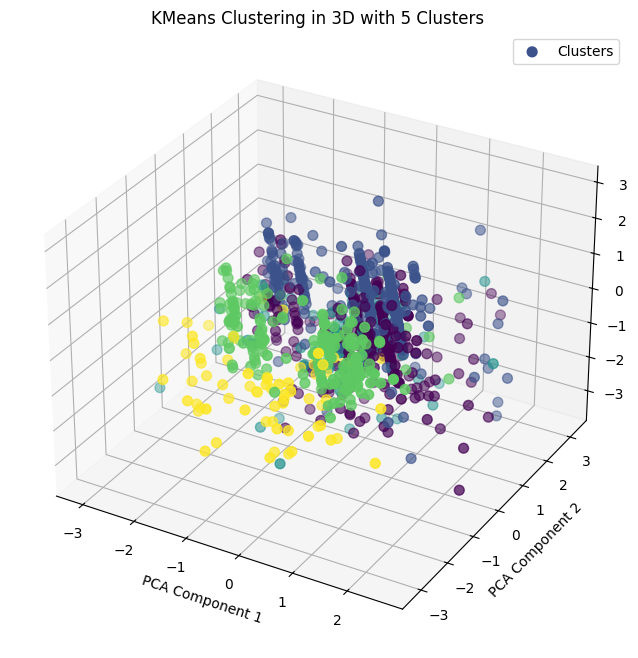

In [ ]:
from sklearn.cluster import KMeans

# Step 12: Apply KMeans clustering (you can adjust k based on what seems appropriate)
kmeans = KMeans(n_clusters=5, random_state=42)  # You can try different values of n_clusters
kmeans_labels = kmeans.fit_predict(data_scaled)

# Step 13: Reduce dimensionality using PCA (first 3 components for better visualization)
data_pca_3d = PCA(n_components=3).fit_transform(data_scaled)

# Step 14: Plot KMeans clustering result in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters
ax.scatter(data_pca_3d[:, 0], data_pca_3d[:, 1], data_pca_3d[:, 2],
           c=kmeans_labels, cmap='viridis', label='Clusters', s=50)

# Labels and title
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title(f"KMeans Clustering in 3D with {kmeans.n_clusters} Clusters")
ax.legend()

# Show the plot
plt.show()

In [ ]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [ ]:
#Step 6 K-fold Cross Validation
from sklearn.model_selection import StratifiedKFold, train_test_split

X = df.drop(columns=['DATE_DIED'], errors='ignore')
y = df['DATE_DIED']

# Step 1: Split into Train+Validation (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Initialize Stratified K-Fold Cross-Validation (5 folds)
strat_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Perform Stratified K-Fold Cross-Validation with 5 folds for hyperparameter tuning
for fold, (train_index, val_index) in enumerate(strat_kf.split(X_train, y_train)):
    print(f"\nFold {fold+1}:")

    # Split data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Print the sizes of the training and validation sets for this fold
    print(f"Training set size: {X_train_fold.shape}, Validation set size: {X_val_fold.shape}")


Fold 1:
Training set size: (656096, 20), Validation set size: (164025, 20)

Fold 2:
Training set size: (656097, 20), Validation set size: (164024, 20)

Fold 3:
Training set size: (656097, 20), Validation set size: (164024, 20)

Fold 4:
Training set size: (656097, 20), Validation set size: (164024, 20)

Fold 5:
Training set size: (656097, 20), Validation set size: (164024, 20)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Hypertuning

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score,make_scorer

In [ ]:
lr = LogisticRegression(max_iter=10000)  # Increase max_iter if convergence issues arise

In [ ]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse of lambda)
    'penalty': ['l1', 'l2'],        # Regularization type: 'l1' (Lasso), 'l2' (Ridge)
    'solver': ['liblinear', 'saga'], # solvers: 'liblinear' for small datasets, 'saga' for large datasets
}

# Initialize HalvingGridSearchCV
halving_search = HalvingGridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    factor=2,  # The reduction factor for resources
    cv=3,      # Cross-validation folds
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Fit the model
halving_search.fit(X_val_fold, y_val_fold)

# Output the best parameters and the best score
print("Best parameters:", halving_search.best_params_)
print("Best score:", halving_search.best_score_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 10251
max_resources_: 164024
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 20
n_resources: 10251
Fitting 3 folds for each of 20 candidates, totalling 60 fits
----------
iter: 1
n_candidates: 10
n_resources: 20502
Fitting 3 folds for each of 10 candidates, totalling 30 fits
----------
iter: 2
n_candidates: 5
n_resources: 41004
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 3
n_candidates: 3
n_resources: 82008
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 4
n_candidates: 2
n_resources: 164016
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.5081247943331147


In [ ]:
# Use the best estimator to make predictions on the test set
lr_best_model = halving_search.best_estimator_
lr_test_accuracy = lr_best_model.score(X_test, y_test)

print("Test Set Accuracy:", lr_test_accuracy)

Test Set Accuracy: 0.938619038096678


In [ ]:
# Initialize DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}


# Initialize HalvingGridSearchCV
halving_search = HalvingGridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    factor=2,  # The reduction factor for resources
    cv=3,      # Cross-validation folds
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Fit the model
halving_search.fit(X_val_fold, y_val_fold)

# Output the best parameters and the best score
print("Best parameters:", halving_search.best_params_)
print("Best score:", halving_search.best_score_)

n_iterations: 9
n_required_iterations: 9
n_possible_iterations: 9
min_resources_: 640
max_resources_: 164024
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 270
n_resources: 640
Fitting 3 folds for each of 270 candidates, totalling 810 fits
----------
iter: 1
n_candidates: 135
n_resources: 1280
Fitting 3 folds for each of 135 candidates, totalling 405 fits
----------
iter: 2
n_candidates: 68
n_resources: 2560
Fitting 3 folds for each of 68 candidates, totalling 204 fits
----------
iter: 3
n_candidates: 34
n_resources: 5120
Fitting 3 folds for each of 34 candidates, totalling 102 fits
----------
iter: 4
n_candidates: 17
n_resources: 10240
Fitting 3 folds for each of 17 candidates, totalling 51 fits
----------
iter: 5
n_candidates: 9
n_resources: 20480
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 6
n_candidates: 5
n_resources: 40960
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 7
n_candidates: 3
n_res

In [ ]:
# Get the best model and evaluate on the test set
dt_best_model = halving_search.best_estimator_
dt_test_score = dt_best_model.score(X_test, y_test)
print("Test Set f1-Score:", dt_test_score)

Test Set f1-Score: 0.9496124976223108


In [ ]:
rf=RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report

# 3. Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],   # Depth of each tree
    'min_samples_split': [2, 5, 10],   # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],     # Min samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Features to consider for the split
    'bootstrap': [True, False]         # Whether to use bootstrap sampling
}

# Initialize HalvingGridSearchCV
halving_search = HalvingGridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    factor=2,  # The reduction factor for resources
    cv=3,      # Cross-validation folds
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Fit the model
halving_search.fit(X_val_fold, y_val_fold)

# Output the best parameters and the best score
print("Best parameters:", halving_search.best_params_)
print("Best score:", halving_search.best_score_)

n_iterations: 10
n_required_iterations: 10
n_possible_iterations: 10
min_resources_: 320
max_resources_: 164024
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 648
n_resources: 320
Fitting 3 folds for each of 648 candidates, totalling 1944 fits
----------
iter: 1
n_candidates: 324
n_resources: 640
Fitting 3 folds for each of 324 candidates, totalling 972 fits
----------
iter: 2
n_candidates: 162
n_resources: 1280
Fitting 3 folds for each of 162 candidates, totalling 486 fits
----------
iter: 3
n_candidates: 81
n_resources: 2560
Fitting 3 folds for each of 81 candidates, totalling 243 fits
----------
iter: 4
n_candidates: 41
n_resources: 5120
Fitting 3 folds for each of 41 candidates, totalling 123 fits
----------
iter: 5
n_candidates: 21
n_resources: 10240
Fitting 3 folds for each of 21 candidates, totalling 63 fits
----------
iter: 6
n_candidates: 11
n_resources: 20480
Fitting 3 folds for each of 11 candidates, totalling 33 fits
----------
iter: 7
n_candidates

In [ ]:
rf_best_model = halving_search.best_estimator_

# 9. Evaluate the best model on the test data
y_pred = rf_best_model.predict(X_test)
print(classification_report(y_test, y_pred))  # Use mean_squared_error for regression tasks

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    190088
           1       0.74      0.51      0.61     14943

    accuracy                           0.95    205031
   macro avg       0.85      0.75      0.79    205031
weighted avg       0.95      0.95      0.95    205031



In [ ]:
import xgboost as xgb

## adding scale_pos_weight for imbalanced class set 12:1
neg_cls_cnt = sum(y_train == 0)
pos_cls_cnt = sum(y_train == 1)
scale_pos_weight = neg_cls_cnt / pos_cls_cnt

scorer = make_scorer(recall_score, pos_label=1)
param_grid = {
    'max_depth': [2, 3, 4],
    'min_child_weight': [.1, .5, 1],
    'learning_rate': [0.005, 0.05, 0.01],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight = scale_pos_weight,
    scoring = scorer
)

halving_search = HalvingGridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    factor=2,  # The reduction factor for resources
    cv=3,      # Cross-validation folds
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Fit the model
halving_search.fit(X_val_fold, y_val_fold)

n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 1281
max_resources_: 164024
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 243
n_resources: 1281
Fitting 3 folds for each of 243 candidates, totalling 729 fits
----------
iter: 1
n_candidates: 122
n_resources: 2562
Fitting 3 folds for each of 122 candidates, totalling 366 fits
----------
iter: 2
n_candidates: 61
n_resources: 5124
Fitting 3 folds for each of 61 candidates, totalling 183 fits
----------
iter: 3
n_candidates: 31
n_resources: 10248
Fitting 3 folds for each of 31 candidates, totalling 93 fits
----------
iter: 4
n_candidates: 16
n_resources: 20496
Fitting 3 folds for each of 16 candidates, totalling 48 fits
----------
iter: 5
n_candidates: 8
n_resources: 40992
Fitting 3 folds for each of 8 candidates, totalling 24 fits
----------
iter: 6
n_candidates: 4
n_resources: 81984
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 7
n_candidates: 2
n_r

HalvingGridSearchCV(cv=3,
                    estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...),
                    factor=2, n_jobs=-1,
                    param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                                'learning_rate': [0.005, 0.05, 0.01],
                                'max_depth': [2, 3, 4],
                                'min_child_weight': [0.1, 0.5, 1],
                                'subsample': [0.7, 0.8, 0.9]},
                    scoring='f1', verbose=2)

In [ ]:
# Get the best model and evaluate on the test set
xgb_best_model = halving_search.best_estimator_
xgb_test_score = xgb_best_model.score(X_test, y_test)
print("Test Set f1-Score:", xgb_test_score)

Test Set f1-Score: 0.8890167828279626


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

lr_pred=lr_best_model.predict(X_test)
dt_pred=dt_best_model.predict(X_test)
rf_pred=rf_best_model.predict(X_test)
xgb_pred=xgb_best_model.predict(X_test)

lr_best_model_acc=accuracy_score(lr_pred,y_test)
dt_best_model_acc=accuracy_score(dt_pred,y_test)
rf_best_model_acc=accuracy_score(rf_pred,y_test)
xgb_best_model_acc=accuracy_score(xgb_pred,y_test)

lr_best_model_precision=precision_score(lr_pred,y_test)
dt_best_model_precision=precision_score(dt_pred,y_test)
rf_best_model_precision=precision_score(rf_pred,y_test)
xgb_best_model_precision=precision_score(xgb_pred,y_test)

lr_best_model_recall=recall_score(lr_pred,y_test)
dt_best_model_recall=recall_score(dt_pred,y_test)
rf_best_model_recall=recall_score(rf_pred,y_test)
xgb_best_model_recall=recall_score(xgb_pred,y_test)

lr_best_model_f1=f1_score(lr_pred,y_test)
dt_best_model_f1=f1_score(dt_pred,y_test)
rf_best_model_f1=f1_score(rf_pred,y_test)
xgb_best_model_f1=f1_score(xgb_pred,y_test)

In [ ]:
#VI. Output final score
acc_scores = [lr_best_model_acc,dt_best_model_acc,rf_best_model_acc,xgb_best_model_acc]
pre_scores = [lr_best_model_precision,dt_best_model_precision,rf_best_model_precision,xgb_best_model_precision]
rec_scores = [lr_best_model_recall,dt_best_model_recall,rf_best_model_recall,xgb_best_model_recall]
f1_scores = [lr_best_model_f1,dt_best_model_f1,rf_best_model_f1,xgb_best_model_f1]
algorithms = ["Logistic Regression","Decision Tree","Random Forest","XGBoost"]

In [ ]:
eval_scores = pd.DataFrame(list(zip(acc_scores,pre_scores,rec_scores,f1_scores)),index=algorithms,columns=['accuracy','precision','recall','f1-score'])

<Figure size 3000x3000 with 0 Axes>

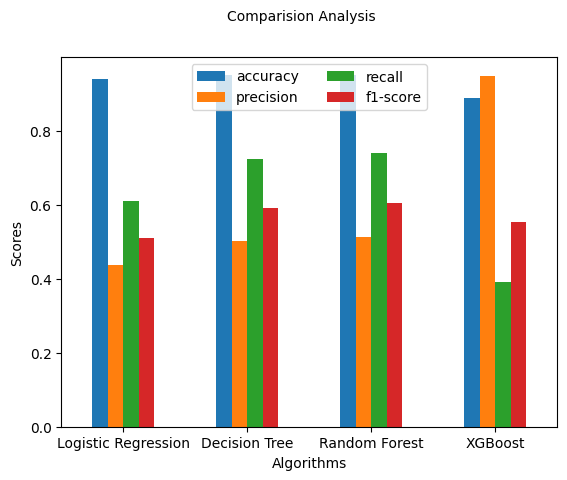

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 4
ind = np.arange(N)
width = 0.25

plt.figure(figsize=(30,30))
eval_scores.plot.bar()
plt.suptitle('Comparision Analysis', fontsize=10)
plt.xlabel("Algorithms", fontsize=10)
plt.ylabel("Scores", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation = 360)
plt.xticks(ind,('Logistic Regression','Decision Tree','Random Forest','XGBoost'))
plt.legend(fontsize = 15)
plt.legend(loc='upper center', prop={'size':10}, ncol=2)
plt.show()

XGB

#Experiment 2 with Reduced Features


Reducing features PREGNANT, TOBACCO

In [ ]:
X_reduced = df.drop(columns=['DATE_DIED','PREGNANT','TOBACCO'], errors='ignore')

# Step 1: Split into Train+Validation (80%) and Test (20%)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Initialize Stratified K-Fold Cross-Validation (5 folds)
strat_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Perform Stratified K-Fold Cross-Validation with 5 folds for hyperparameter tuning
for fold, (train_index, val_index) in enumerate(strat_kf.split(X_train_r, y_train_r)):
    print(f"\nFold {fold+1}:")

    # Split data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train_r.iloc[train_index], X_train_r.iloc[val_index]
    y_train_fold, y_val_fold = y_train_r.iloc[train_index], y_train_r.iloc[val_index]

    # Print the sizes of the training and validation sets for this fold
    print(f"Training set size: {X_train_fold.shape}, Validation set size: {X_val_fold.shape}")


Fold 1:
Training set size: (656096, 18), Validation set size: (164025, 18)

Fold 2:
Training set size: (656097, 18), Validation set size: (164024, 18)

Fold 3:
Training set size: (656097, 18), Validation set size: (164024, 18)

Fold 4:
Training set size: (656097, 18), Validation set size: (164024, 18)

Fold 5:
Training set size: (656097, 18), Validation set size: (164024, 18)


Re running Log-regession, DT, RF, XGB classifiers with reduced data

In [ ]:
# re-fitting the models with reduced features.
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

lr_best_model.fit(X_train_r,y_train_r)
dt_best_model.fit(X_train_r,y_train_r)
rf_best_model.fit(X_train_r,y_train_r)
xgb_best_model.fit(X_train_r,y_train_r)

lr_pr=lr_best_model.predict(X_test_r)
dt_pr=dt_best_model.predict(X_test_r)
rf_pr=rf_best_model.predict(X_test_r)
xgb_pr=xgb_best_model.predict(X_test_r)

lr_acc_r=accuracy_score(lr_pr,y_test_r)
dt_acc_r=accuracy_score(dt_pr,y_test_r)
rf_acc_r=accuracy_score(rf_pr,y_test_r)
xgb_acc_r=accuracy_score(xgb_pr,y_test_r)

lr_precision_r=precision_score(lr_pr,y_test_r)
dt_precision_r=precision_score(dt_pr,y_test_r)
rf_precision_r=precision_score(rf_pr,y_test_r)
xgb_precision_r=precision_score(xgb_pr,y_test_r)

lr_recall_r=recall_score(lr_pr,y_test_r)
dt_recall_r=recall_score(dt_pr,y_test_r)
rf_recall_r=recall_score(rf_pr,y_test_r)
xgb_recall_r=recall_score(xgb_pr,y_test_r)

lr_f1_r=f1_score(lr_pr,y_test_r)
dt_f1_r=f1_score(dt_pr,y_test_r)
rf_f1_r=f1_score(rf_pr,y_test_r)
xgb_f1_r=f1_score(xgb_pr,y_test_r)

print("Accuracy - Logistic Regression score:",lr_acc_r)
print("Accuracy - Decision Tree Classifier score:",dt_acc_r)
print("Accuracy - RandomForest Classifier score:",rf_acc_r)
print("Accuracy - XGBoost Classifier score:",xgb_acc_r)

print()

print("Precision - Logistic Regression score:",lr_precision_r)
print("Precision - Decision Tree Classifier score:",dt_precision_r)
print("Precision - RandomForest Classifier score:",rf_precision_r)
print("Precision - XGBoost Classifier score:",xgb_precision_r)

print()

print("Recall - Logistic Regression score:",lr_recall_r)
print("Recall - Decision Tree Classifier score:",dt_recall_r)
print("Recall - RandomForest Classifier score:",rf_recall_r)
print("Recall - XGBoost Classifier score:",xgb_recall_r)

print()

print("f1 - Logistic Regression score:",lr_f1_r)
print("f1 - Decision Tree Classifier score:",dt_f1_r)
print("f1 - RandomForest Classifier score:",rf_f1_r)
print("f1 - XGBoost Classifier score:",xgb_f1_r)

Accuracy - Logistic Regression score: 0.9386970750764518
Accuracy - Decision Tree Classifier score: 0.9501099833683687
Accuracy - RandomForest Classifier score: 0.9520950490413644
Accuracy - XGBoost Classifier score: 0.8879486516673089

Precision - Logistic Regression score: 0.44241450846550223
Precision - Decision Tree Classifier score: 0.5069263200160611
Precision - RandomForest Classifier score: 0.5269356889513485
Precision - XGBoost Classifier score: 0.9490731446162083

Recall - Logistic Regression score: 0.6094210914454278
Recall - Decision Tree Classifier score: 0.72585281717133
Recall - RandomForest Classifier score: 0.7409428813399831
Recall - XGBoost Classifier score: 0.389668910564638

f1 - Logistic Regression score: 0.5126594548485905
f1 - Decision Tree Classifier score: 0.5969502344458016
f1 - RandomForest Classifier score: 0.6158779820101682
f1 - XGBoost Classifier score: 0.5524952277065721


Install and preparing XGBoost for classifying using ensemble learning technique

In [ ]:
from sklearn.model_selection import cross_validate

def cross_validation(model, _X, _y, _cv=3):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)

      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

{'Training Accuracy scores': array([0.95530108, 0.95483286, 0.95512009]), 'Mean Training Accuracy': 95.50846765078474, 'Training Precision scores': array([0.7643063 , 0.75728452, 0.7604982 ]), 'Mean Training Precision': 0.7606963387087545, 'Training Recall scores': array([0.55908851, 0.55961553, 0.56083116]), 'Mean Training Recall': 0.5598450671220886, 'Training F1 scores': array([0.64578593, 0.6436148 , 0.64557876]), 'Mean Training F1 Score': 0.644993161180556, 'Validation Accuracy scores': array([0.95047444, 0.95082561, 0.94992922]), 'Mean Validation Accuracy': 95.04097560231499, 'Validation Precision scores': array([0.72036999, 0.72151207, 0.71088412]), 'Mean Validation Precision': 0.7175887252055206, 'Validation Recall scores': array([0.5237904, 0.5297631, 0.5274808]), 'Mean Validation Recall': 0.5270114347989207, 'Validation F1 scores': array([0.60655023, 0.6109455 , 0.60560134]), 'Mean Validation F1 Score': 0.6076990239945769}


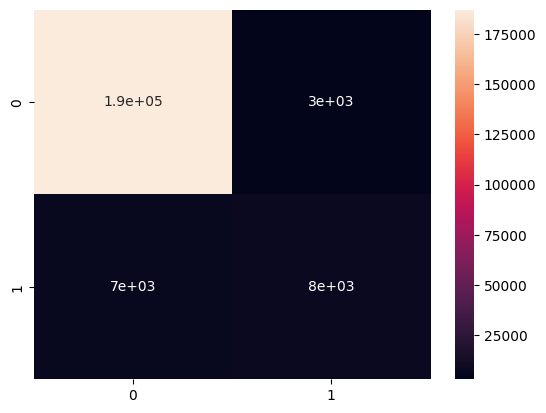

In [ ]:
from sklearn.metrics import confusion_matrix,log_loss,roc_auc_score,matthews_corrcoef
import seaborn as sns
from sklearn.ensemble import VotingClassifier

estimators=[ ('lr', lr_best_model), ('dt',dt_best_model),('rf', rf_best_model), ('xgb', xgb_best_model)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

ensemble.fit(X_train_r, y_train_r)

ensemble.score(X_test_r, y_test_r)

y_pred_hv = ensemble.predict(X_test_r)

CM_hv=confusion_matrix(y_test_r,y_pred_hv)
sns.heatmap(CM_hv, annot=True)

TN = CM_hv[0][0]
FN = CM_hv[1][0]
TP = CM_hv[1][1]
FP = CM_hv[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test_r, y_pred_hv)
acc_hv= accuracy_score(y_test_r, y_pred_hv)
roc=roc_auc_score(y_test_r, y_pred_hv)
prec_hv = precision_score(y_test_r, y_pred_hv)
rec_hv = recall_score(y_test_r, y_pred_hv)
f1s_hv = f1_score(y_test_r, y_pred_hv)

score_hv= round(acc_hv*100,2)
precision_hv= round(prec_hv*100,2)
recall_hv = round(rec_hv*100,2)
f1_hv = round(f1s_hv*100,2)

mathew = matthews_corrcoef(y_test_r, y_pred_hv)
model_results =pd.DataFrame([['Hard Voting',acc_hv, prec_hv,rec_hv,specificity, f1s_hv,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results


hv_result = cross_validation(ensemble, X_train_r, y_train_r, 3)
print(hv_result)


In [ ]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        # Set size of plot
        plt.figure(figsize=(12,3))
        labels = ["1st Fold", "2nd Fold", "3rd Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

{'Training Accuracy scores': array([0.94977933, 0.95004454, 0.95033361]), 'Mean Training Accuracy': 95.00524920828043, 'Training Precision scores': array([0.64244487, 0.64471436, 0.64594688]), 'Mean Training Precision': 0.6443687017009413, 'Training Recall scores': array([0.70113183, 0.7006801 , 0.70490363]), 'Mean Training Recall': 0.7022385214810499, 'Training F1 scores': array([0.67050664, 0.6715332 , 0.6741387 ]), 'Mean Training F1 Score': 0.6720595101139416, 'Validation Accuracy scores': array([0.94636652, 0.94643602, 0.94564935]), 'Mean Validation Accuracy': 94.61506283813273, 'Validation Precision scores': array([0.62116607, 0.62288826, 0.61534958]), 'Mean Validation Precision': 0.6198013015582416, 'Validation Recall scores': array([0.6769725 , 0.67175266, 0.67811073]), 'Mean Validation Recall': 0.6756119606291624, 'Validation F1 scores': array([0.64786973, 0.6463983 , 0.64520751]), 'Mean Validation F1 Score': 0.6464918472892361}


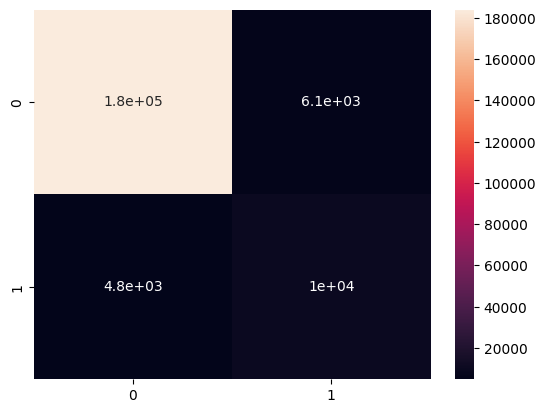

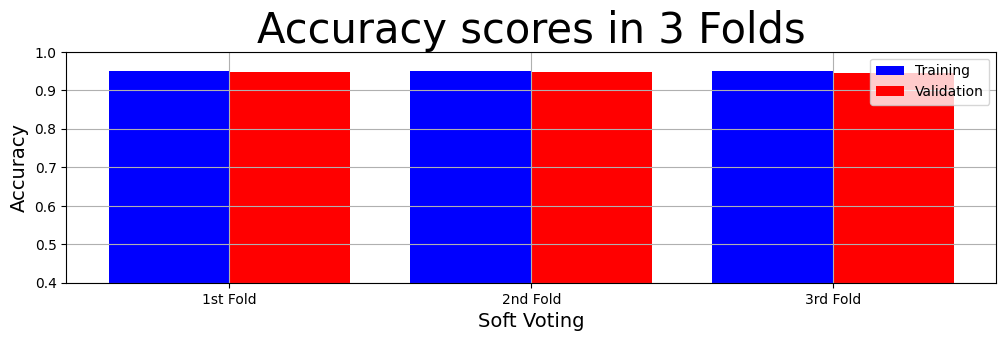

In [ ]:
ensemble1 = VotingClassifier(estimators, voting='soft')

ensemble1.fit(X_train_r, y_train_r)

ensemble1.score(X_test_r, y_test_r)

y_pred_sv = ensemble1.predict(X_test_r)

CM_sv=confusion_matrix(y_test_r,y_pred_sv)
sns.heatmap(CM_sv, annot=True)

TN = CM_sv[0][0]
FN = CM_sv[1][0]
TP = CM_sv[1][1]
FP = CM_sv[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test_r, y_pred_sv)
acc_sv= accuracy_score(y_test_r, y_pred_sv)
roc=roc_auc_score(y_test_r, y_pred_sv)
prec_sv = precision_score(y_test_r, y_pred_sv)
rec_sv = recall_score(y_test_r, y_pred_sv)
f1s_sv = f1_score(y_test_r, y_pred_sv)

score_sv= round(acc_sv*100,2)
precision_sv= round(prec_sv*100,2)
recall_sv = round(rec_sv*100,2)
f1_sv = round(f1s_sv*100,2)

mathew = matthews_corrcoef(y_test_r, y_pred_sv)
model_results1 =pd.DataFrame([['Soft Voting',acc_sv, prec_sv,rec_sv,specificity, f1s_sv,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results1


sv_result = cross_validation(ensemble1, X_train_r, y_train_r, 3)
print(sv_result)

# Plot Accuracy Result
model_name = "Soft Voting"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 3 Folds",
            sv_result["Training Accuracy scores"],
            sv_result["Validation Accuracy scores"])

In [ ]:
#VI. Output final score
acc_scores = [lr_acc_r,dt_acc_r,rf_acc_r,xgb_acc_r,acc_hv,acc_sv]
pre_scores = [lr_precision_r,dt_precision_r,rf_precision_r,xgb_precision_r,prec_hv,prec_sv]
rec_scores = [lr_recall_r,dt_recall_r,rf_recall_r,xgb_recall_r,rec_hv,rec_sv]
f1_scores = [lr_f1_r,dt_f1_r,rf_f1_r,xgb_f1_r,f1s_hv,f1s_sv]
algorithms = ["Logistic Regression","Decision Tree","Random Forest","XGBoost","Hard Voting","Soft Voting"]

In [ ]:
eval_scores = pd.DataFrame(list(zip(acc_scores,pre_scores,rec_scores,f1_scores)),index=algorithms,columns=['accuracy','precision','recall','f1-score'])

In [ ]:
eval_scores.head(10)

,accuracy,precision,recall,f1-score
Logistic Regression,0.93870,0.44241,0.60942,0.51266
Decision Tree,0.95011,0.50693,0.72585,0.59695
Random Forest,0.95210,0.52694,0.74094,0.61588
XGBoost,0.88795,0.94907,0.38967,0.55250
Hard Voting,0.95133,0.72661,0.53269,0.61472
Soft Voting,0.94674,0.62411,0.67711,0.64953


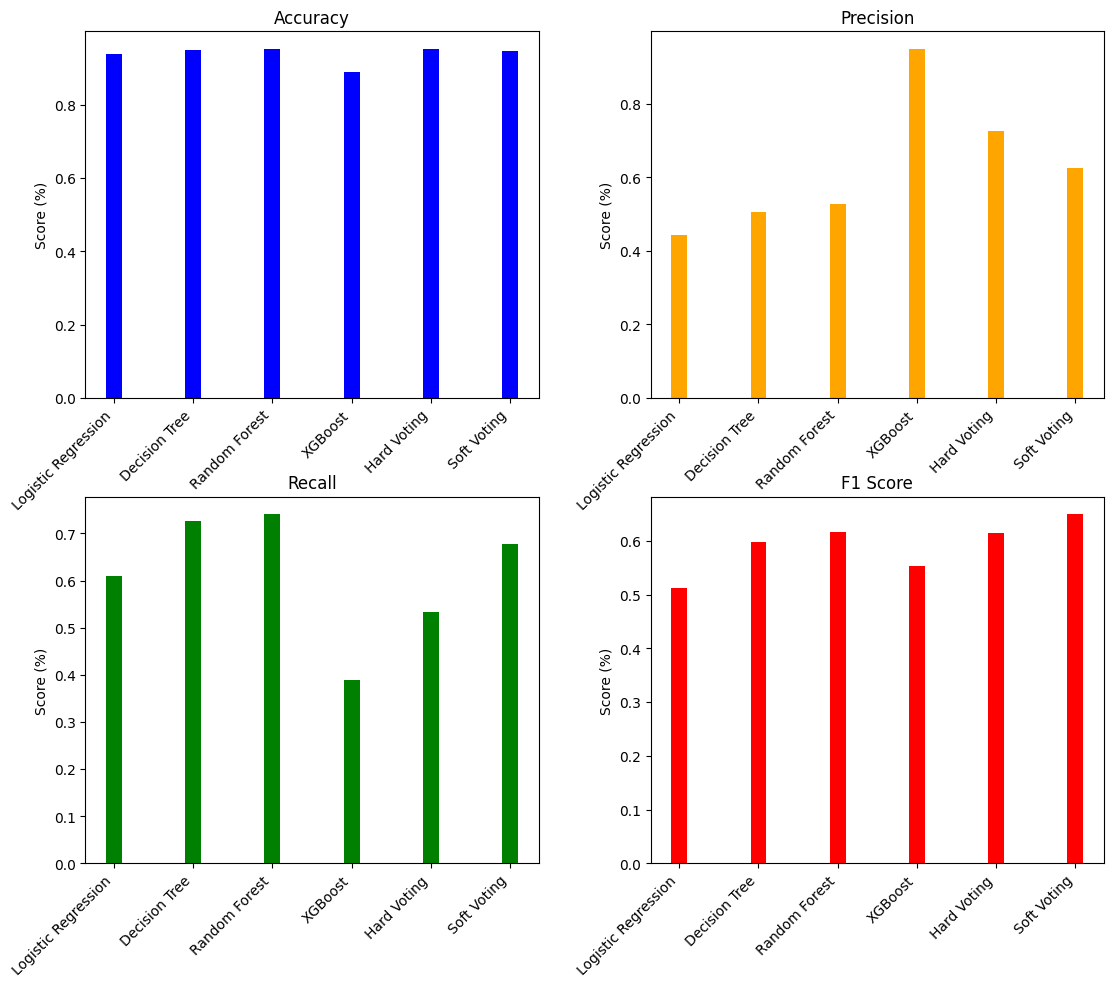

In [ ]:
# Bar width
bar_width = 0.2
index = np.arange(len(algorithms))  # The x locations for the groups

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout(pad=5.0)

# Plot Accuracy
axes[0, 0].bar(index, acc_scores, bar_width, color='blue', label='Accuracy')
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_xticks(index)
axes[0, 0].set_xticklabels(algorithms, rotation=45, ha='right')
axes[0, 0].set_ylabel('Score (%)')

# Plot Precision
axes[0, 1].bar(index, pre_scores, bar_width, color='Orange', label='Precision')
axes[0, 1].set_title('Precision')
axes[0, 1].set_xticks(index)
axes[0, 1].set_xticklabels(algorithms, rotation=45, ha='right')
axes[0, 1].set_ylabel('Score (%)')

# Plot Recall
axes[1, 0].bar(index, rec_scores, bar_width, color='green', label='Recall')
axes[1, 0].set_title('Recall')
axes[1, 0].set_xticks(index)
axes[1, 0].set_xticklabels(algorithms, rotation=45, ha='right')
axes[1, 0].set_ylabel('Score (%)')

# Plot F1-Score
axes[1, 1].bar(index, f1_scores, bar_width, color='red', label='F1 Score')
axes[1, 1].set_title('F1 Score')
axes[1, 1].set_xticks(index)
axes[1, 1].set_xticklabels(algorithms, rotation=45, ha='right')
axes[1, 1].set_ylabel('Score (%)')

# Show the plot
plt.show()